# 다중 클래스 분류

타겟 클래스가 2개 이상인 경우를 다중 클래스 분류(Multi-Class Classification) 문제라고 한다. 다중 클래스 분류 문제는 다음과 같이 여러개의 이진 클래스 분류(Binary Class Classification) 문제로 변환하여 해결한다.


## OvO (One-Vs-One) 

* $K$개의 타겟 클래스가 존재하는 경우, 
* 이 중 2개의 클래스 조합을 선택하여 $K(K - 1)/2$개의 이진 클래스 분류 문제를 풀고 
* 투표를 통해 가장 많은 표를 얻은 클래스를 선택
* 실제로는 정규화된 판결 기준값을 이용
* 스포츠 리그를 생각하면 됨 - 팀끼리 붙어서 경쟁하고 점수에 따라 가중치를 둬서 모든 팀끼리 서로 매치한후 점수가 제일 높은 애를 선택 


* `OneVsOneClassifier` 클래스

## OvR (One-vs-the-Rest) 

* $K$개의 타겟 클래스가 존재하는 경우, 
* 각각의 클래스에 대해 표본이 속하는지 속하지 않는지의 이진 클래스 분류 문제를 풀고 
* 판결 기준값이 가장 큰 클래스를 선택
* 예를 들면 1일 확률과 2,3,4,5의 모두의 확률을 비교, 2일확률VS.1,3,4,5일 확률비교 

* `OneVsRestClassifier` 클래스 

In [3]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


In [4]:
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

iris = load_iris()
model1 = LogisticRegression().fit(iris.data, iris.target)## 확률론적 방식이지만 0,1 베르누이 분포를 기반으로 함 
model2 = OneVsRestClassifier(LogisticRegression()).fit(iris.data, iris.target) ## 이미 OVR이 들어가있음 
model3 = OneVsOneClassifier(LogisticRegression()).fit(iris.data, iris.target)

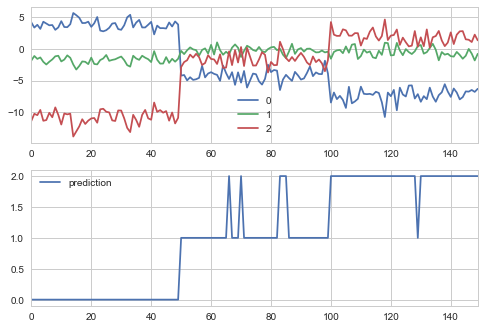

In [5]:
ax1 = plt.subplot(211)
pd.DataFrame(model1.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model1.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show()

## 가로축 데이터번호 ## 세로축 0번,1,2번으로 나눠져 있는 클래스답
## 가로축 0~50,51~100,101~150으로 데이터가짐 세로축은 그에대한 정답을 가짐 
## 두번째 그래프 70번의 경우 misclassification 

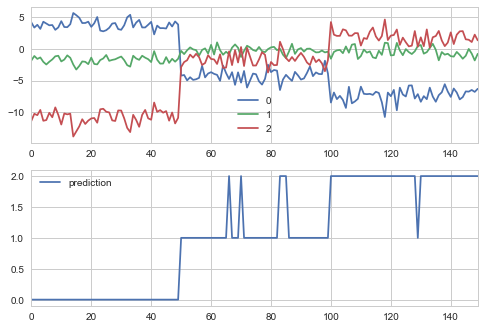

In [6]:
ax1 = plt.subplot(211)
pd.DataFrame(model2.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model2.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show() ## 첫번째 그림에서 50~100의 데이터값이 애매하다는것을 알수 있음

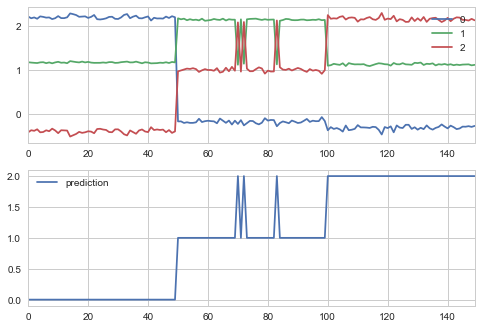

In [7]:
ax1 = plt.subplot(211)
pd.DataFrame(model3.decision_function(iris.data)).plot(ax=ax1)
ax2 = plt.subplot(212)
pd.DataFrame(model3.predict(iris.data), columns=["prediction"]).plot(ax=ax2)
plt.show() ## 리그전을 한경우 실수값으로 나오므로 대부분 크게 나뉘어짐, prediction이 깨끗 하게 나옴 